# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [548]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [549]:
DATA_FOLDER = 'data/'

POLICIES_DATASET = DATA_FOLDER+"data.tsv.gz"
FONTS_DATASET = DATA_FOLDER+"fonts.csv"

In [550]:
policies = pd.read_csv(POLICIES_DATASET, sep='\t', compression = 'gzip', on_bad_lines = 'skip')
policies.head()


,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1


In [551]:
fonts = pd.read_csv(FONTS_DATASET)
fonts.head()

,id,font
0,1,Helvetica
1,2,Helvetica
2,3,Helvetica
3,4,Helvetica
4,5,Arial


### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

#### Task 2.1: 

In [552]:
if policies.id.is_unique == False:
    policies = policies.drop_duplicates('id')
policies.id.is_unique

True

#### Task 2.2: 
First we check that there is always an updated number for each baseline motorcycle.
To do so we identify locations of all NaN values in policies dataframe. 
We then evaluate each pair of columns baseline_i and update_i to check that NaN values are aligned/consistent. 
The for loop returns True for each valid motorcycle pair, and False if there is an error.

In [553]:
nan_of_policies = policies.notna().iloc[:,2:-1]
for i in range(0, nan_of_policies.shape[1], 2):
    print(nan_of_policies.iloc[:, i].equals(nan_of_policies.iloc[:, i+1]))

True
True
True
True


Since all values are True, we see that there is no need to make correction regarding this issue.

We then sum the number of non NaN values from each row, divide it by 2 and compare this number to the column motorcycle_counts. The .all function would return false if there was an inconsistency. We can see that it is not the case.

In [554]:
((nan_of_policies.sum(axis=1)/2).eq(policies.motorcycle_count)).all()

True

#### Task 2.3: 

In [555]:
mean = policies.mean(numeric_only=True).drop(['id', 'motorcycle_count'])
median = policies.median(numeric_only=True).drop(['id', 'motorcycle_count'])
pd.concat([mean.rename('mean'),median.rename('median')], axis = 1)

,mean,median
baseline_motorcycle1,7.413998e+14,56341.5
update_motorcycle1,7.413998e+14,82397.5
baseline_motorcycle2,6.732597e+04,56157.5
update_motorcycle2,9.227763e+04,82061.0
baseline_motorcycle3,6.765732e+04,58821.0
update_motorcycle3,9.284941e+04,85645.0
baseline_motorcycle4,6.782798e+04,68181.0
update_motorcycle4,9.337428e+04,93387.5


We observe impossible values for the mean motorcycle 1

Let's now try to visualize eventual outliers:

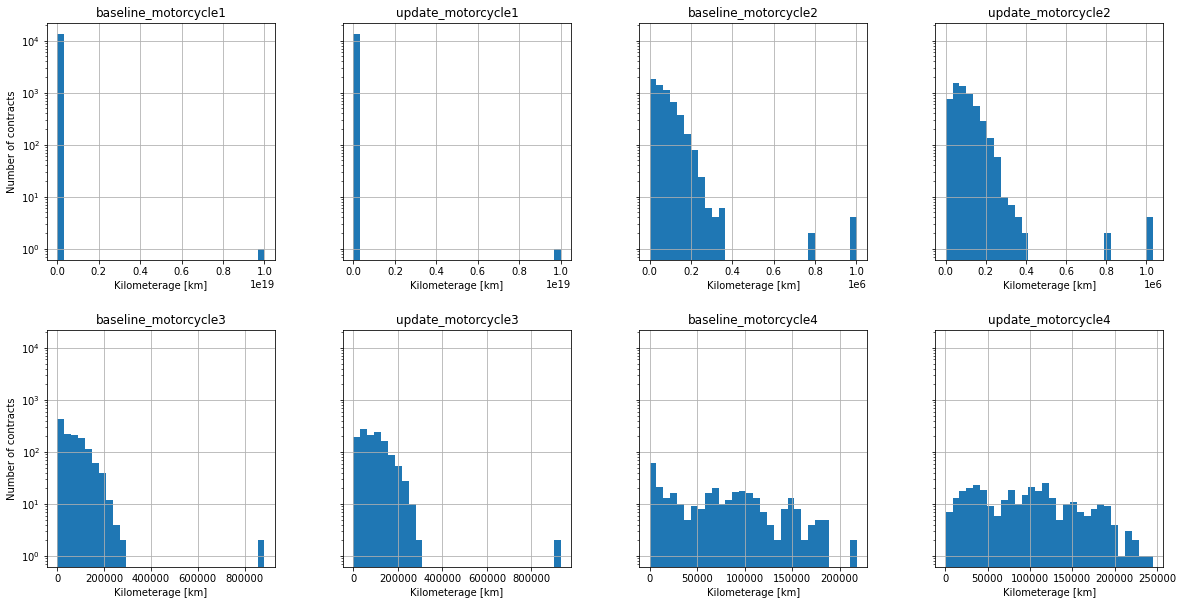

In [556]:
ax = policies.drop(columns=['id', 'condition', 'motorcycle_count']).hist(layout=[2,4], figsize=[20,10], bins=30, sharey=True, log=True);
ax[0,0].set_ylabel("Number of contracts");
ax[1,0].set_ylabel("Number of contracts");

ax[0,0].set_xlabel("Kilometerage [km]");
ax[1,0].set_xlabel("Kilometerage [km]");
ax[0,1].set_xlabel("Kilometerage [km]");
ax[1,1].set_xlabel("Kilometerage [km]");
ax[0,2].set_xlabel("Kilometerage [km]");
ax[1,2].set_xlabel("Kilometerage [km]");
ax[0,3].set_xlabel("Kilometerage [km]");
ax[1,3].set_xlabel("Kilometerage [km]");

We observe outliers for the first 3 motorcycles.
So we threshold at 700000 to remove these extremes outliers.

In [557]:
cut_value = 700000

policies = policies.drop(policies[policies.baseline_motorcycle1 > cut_value].index)
policies = policies.drop(policies[policies.baseline_motorcycle2 > cut_value].index)
policies = policies.drop(policies[policies.baseline_motorcycle3 > cut_value].index)
policies = policies.drop(policies[policies.update_motorcycle1 > cut_value].index)
policies = policies.drop(policies[policies.update_motorcycle2 > cut_value].index)
policies = policies.drop(policies[policies.update_motorcycle3 > cut_value].index)

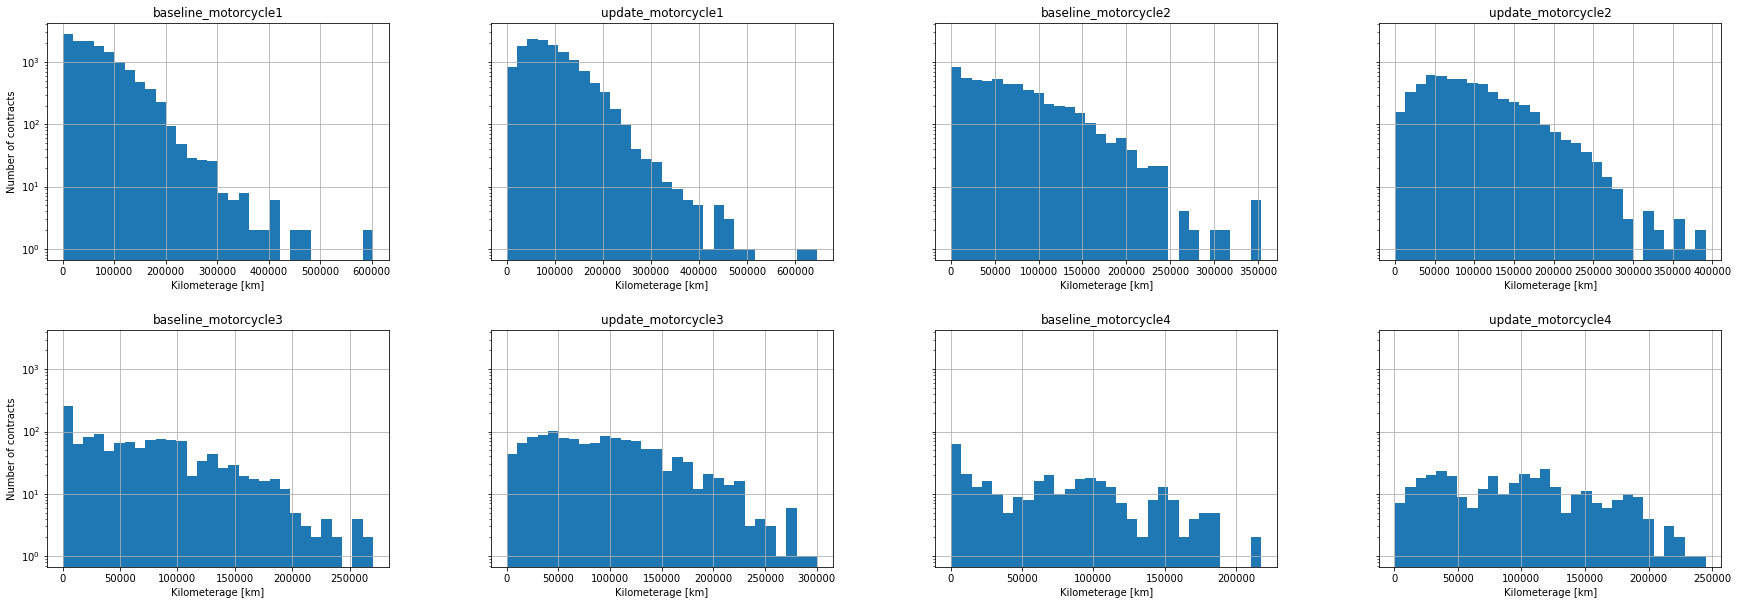

In [558]:
ax = policies.drop(columns=['id', 'condition', 'motorcycle_count']).hist(layout=[2,4], figsize=[30,10], bins=30, sharey=True, log=True);
ax[0,0].set_ylabel("Number of contracts");
ax[1,0].set_ylabel("Number of contracts");

ax[0,0].set_xlabel("Kilometerage [km]");
ax[1,0].set_xlabel("Kilometerage [km]");
ax[0,1].set_xlabel("Kilometerage [km]");
ax[1,1].set_xlabel("Kilometerage [km]");
ax[0,2].set_xlabel("Kilometerage [km]");
ax[1,2].set_xlabel("Kilometerage [km]");
ax[0,3].set_xlabel("Kilometerage [km]");
ax[1,3].set_xlabel("Kilometerage [km]");

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

#### Task 3.1:

This first task is quite straight-forward. We simply calculate the means by selecting the correct columns via their names (with the filter function) and assign these values to their respective columns, and then substract them to get the third column. Note that the skipna argument is true by default so there's no need to add it in the call of mean(), but we add the argument axis=1 to compute the means by row.

In [559]:
#Create the 3 new columns by filtering the columns of interest and calculating their mean
policies["baseline_average"]=policies.filter(regex="^baseline_motorcycle").mean(axis=1)
policies["update_average"]=policies.filter(regex="^update_motorcycle").mean(axis=1)
policies["diff_average"]=policies["update_average"]-policies["baseline_average"]

#Check that the new columns are correctly inserted in the Dataframe
policies.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0


#### Task 3.2:

We could use the median instead of the mean in order to be more robust towards big differences in kilometrage between motorcycles. For exemple, in the case where a motorcycle has far less kilometrage than the others, with the median, it won't be hidden by the other motorcycles.

#### Task 3.3:

We chose to use a logarithmic axis for the number of contracts on each count of motorcycle to make the graph more readable (otherwise the count of contract with 4 motorcycles is nearly invisible). We also added a grid to refer more easily to the logarithmic scale.

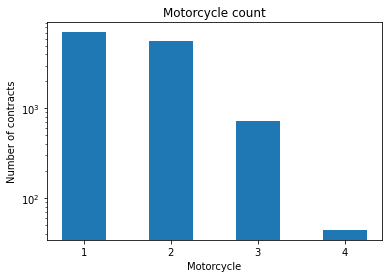

In [615]:
ax = policies["motorcycle_count"].hist(log=True, grid=False, bins=np.arange(1,6)-0.5, rwidth=0.5);
ax.set_title("Motorcycle count")
ax.set_xticks([1,2,3,4])
ax.set_xlabel("Motorcycle");
ax.set_ylabel("Number of contracts");

#### Task 3.4:

For this task we can use the function mean() and std() of pandas library and print the results (with 2 decimals):

In [616]:
print("The mean for the average kilometrage of each policy for the updated contrat is : %.2f" % policies.update_average.mean()\
      +" and the standard deviation is : %.2f" % policies.update_average.std())

The mean for the average kilometrage of each policy for the updated contrat is : 91749.53 and the standard deviation is : 49911.10


#### Task 3.5:

We flatten the 4 columns to calculate the mean and the std using a single line of code. To do so we convert the DataFrame to a numpy array and then flatten it before finally calculating the mean:

In [617]:
print("The overall mean of the updated_motorcycle including only contract with 4 motorcycles is : %.2f"\
      %policies[policies.motorcycle_count==4].filter(regex="^update_motorcycle").to_numpy().flatten().mean())

The overall mean of the updated_motorcycle including only contract with 4 motorcycles is : 113443.86


In [618]:
print("And the resulting standard deviation is : %.2f"\
      %policies[policies.motorcycle_count==4].filter(regex="^update_motorcycle").to_numpy().flatten().std())

And the resulting standard deviation is : 82911.91


#### Task 3.6:

### Not so sure for this task, ask the others

First of all, we state that we made the assumpions that the mean of the subset of data of policies with 4 motorcycles should not differ by a lot from the mean over all policies. As we observe from our data, the mean is quite different if we compute it by policies or by motorcycles, and so does the standard deviation. Since all policies don't have the same number of motorcycles- in particular, there is much more policies with 1 or 2 motorcycles than with 3 or 4- taking the mean over policies will shift it towards the mean of policies with 1 or 2 motorcycles. On the other case, computing the mean over all motorcycles is more balanced as each motorcycle counts the same. Furthermore, as stated in task 3.2, taking the mean on policies may hide some artifacts if a client lied on a single motorcycle even though multiple motorcycles are present in the contract.

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

#### Task 4.1:

In [619]:
sign_bottom = policies.query('condition == "Sign Bottom"')['update_average']
sign_top = policies.query('condition == "Sign Top"')['update_average']
policies.groupby(['condition'])[['update_average']].describe()

update_average                                              \
                     count          mean           std    min      25%   
condition                                                                
Sign Bottom         6655.0  98214.985312  49997.140285  980.0  62758.5   
Sign Top            6819.0  85439.578494  49014.991874  125.0  49397.5   

                                           
                 50%        75%       max  
condition                                  
Sign Bottom  91157.0  125626.25  511887.0  
Sign Top     77925.0  111973.75  451104.0

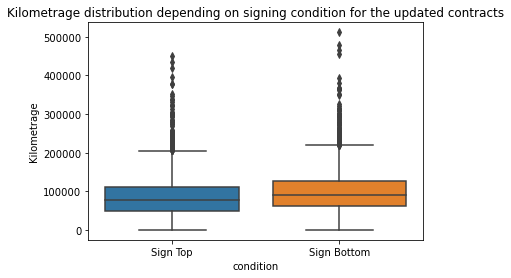

In [633]:
ax = sns.boxplot(x='condition', y='update_average', data=policies);
ax.set_title('Kilometrage distribution depending on signing condition for the updated contracts');
ax.set_ylabel('Kilometrage');

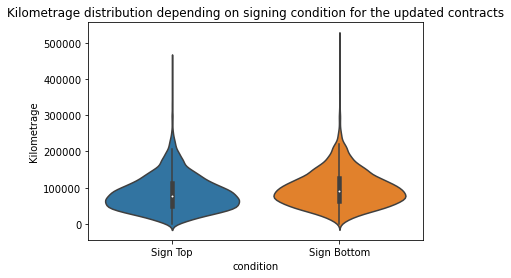

In [634]:
ax = sns.violinplot(x='condition', y='update_average', data=policies);
ax.set_title('Kilometrage distribution depending on signing condition for the updated contracts');
ax.set_ylabel('Kilometrage');

#### Task 4.2:

In [629]:
stats.ttest_ind(sign_bottom,sign_top)

Ttest_indResult(statistic=14.977299124191866, pvalue=2.6236053282843453e-50)

Given that the assumptions for the test are satisfied we proceed with the Student's t-test and obtain a p-value <<. 0.05 therefore we reject the null hypothesis and can conclude that the difference between the average kilometrage across polices where the signing was done at the bottom versus at the top is stastically significant.

#### Task 4.3:

As shown in the previous two points both from a visual and analitycal perspective signing at the top seems, contrary to our expectation, to increase disonesty as the average kilometrage for the policies signed at the top is significantly lower than the ones signed at the bottom.

#### Task 4.4:

I would not expect any statistically significant difference between the average of the two given that the signing at top/bottom randomized is only applied to the updated contracts.

#### Task 4.5:

In [631]:
sign_bottom_baseline = policies.query('condition == "Sign Bottom"')['baseline_average']
sign_top_baseline = policies.query('condition == "Sign Top"')['baseline_average']
policies.groupby(['condition'])[['baseline_average']].describe()

baseline_average                                            \
                       count          mean           std  min      25%   
condition                                                                
Sign Bottom           6655.0  74541.966905  48241.881875  0.0  39640.5   
Sign Top              6819.0  59339.012416  47132.612618  0.0  24329.5   

                                           
                 50%        75%       max  
condition                                  
Sign Bottom  67313.0  100212.75  463284.0  
Sign Top     51055.0   83013.75  403733.0

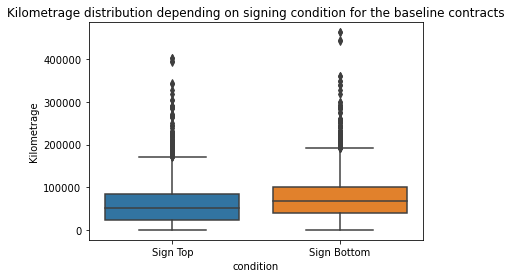

In [635]:
ax = sns.boxplot(x='condition', y='baseline_average', data=policies);
ax.set_title('Kilometrage distribution depending on signing condition for the baseline contracts');
ax.set_ylabel('Kilometrage');

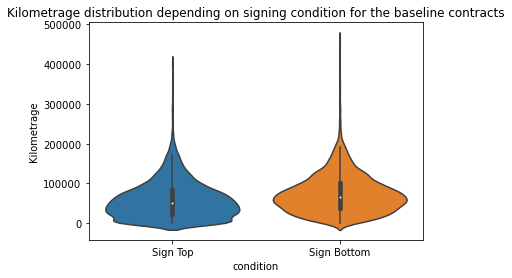

In [636]:
ax = sns.violinplot(x='condition', y='baseline_average', data=policies);
ax.set_title('Kilometrage distribution depending on signing condition for the baseline contracts');
ax.set_ylabel('Kilometrage');

#### Task 4.6:

In [637]:
stats.ttest_ind(sign_bottom_baseline,sign_top_baseline)

Ttest_indResult(statistic=18.503077308838225, pvalue=1.6766682915476814e-75)

The difference between the two scenarios in the baseline contracts is also statistically significant as we reject the null hypothesis being the p-value significantly lower than 0.05.

This difference is not what we expected : The kilometrage mean is also lower for the baseline policies signed at the top. There must be something else that explain this difference. Maybe someone tempered with the data.

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

##### Task 5.1

We choose to use a histgram to plot the distribution of one variable.

In to better visualize the distribution we choose to restrict the range to 400,000km.

In [639]:
num_in_range = policies.loc[policies['baseline_motorcycle1']<400000, 'baseline_motorcycle1'].count()
percent_in_range = num_in_range / policies['baseline_motorcycle1'].count() * 100
print('This shows that the chosen range contains',percent_in_range, 'of measurements')

This shows that the chosen range contains 99.91093958735343 of measurements


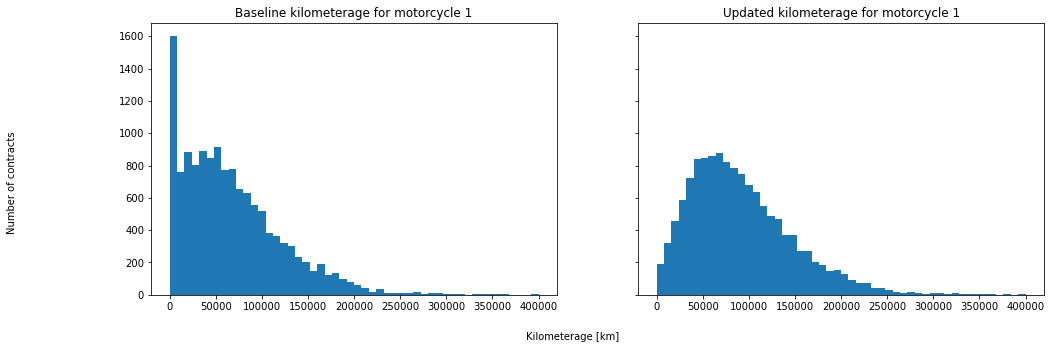

In [640]:
fig, ax = plt.subplots(1,2,figsize= (16,5), sharey = True, sharex = True)

ax[0].hist(policies['baseline_motorcycle1'], bins=50, range=[0,400000])
ax[0].set_title('Baseline kilometerage for motorcycle 1')
ax[1].hist(policies['update_motorcycle1'], bins=50, range=[0,400000])
ax[1].set_title('Updated kilometerage for motorcycle 1')

fig.text(0.45,0, "Kilometerage [km]");
fig.text(0,0.3, "Number of contracts", rotation = 90);

##### Task 5.2 
Plot of the difference in kilometerage between the update and the baseline for motorcycle 1. 

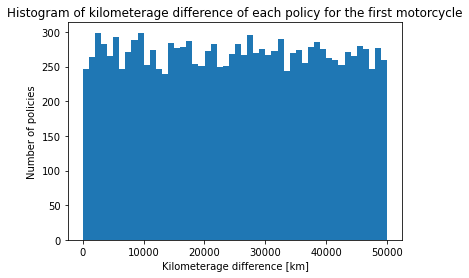

In [642]:
plt.hist(policies['update_motorcycle1'] - policies['baseline_motorcycle1'], bins=50)
plt.title('Histogram of kilometerage difference of each policy for the first motorcycle')
plt.ylabel('Number of policies');
plt.xlabel('Kilometerage difference [km]');

#### Task 5.3 - discussion/ interpretation of results:

The first observation, made from the baseline kilometerage graph in part 5.1 is that the bin shows a very high peak. It seems the number of motorcycles reporting a very low baseline kilometerage is disproportionately high with respect to the rest of the data. 
It is understandable that amongst people signing new contracts there are a number of brand new motorcycles, but this first peak still looks disproportionately high. 
It seems more likely that a number of clients renewing a contract for a motorcycle that hasn't been used much try to pass it off as a brand new motorcycle and thus report a kilometerage near zero. 

I would have to look at the contract details, to understand how the pricing varies with kilometerage.
The graph from part 5.2 shows a sudden cutoff in kilometerage difference at 50,000 km. If the insurance price increases once this threshold is reached, then it gives clients incentive to lie about their kilometerage and remain below this threshold. 

Another remark is the oddly "perfect" distribution  of kilometerage difference across the whole spectrum in the graph from part 5.2. One would expect more small difference and less extreme large differences. It is odd that there are almost exactly the same number of people using their motorcycle very little, moderately, and all the time ... 
One would expect most people to use a motorcycle periodically, and a smaller number of enthusiasts to use it all the time. 
This just leaves me to wonder if some sort of tampering has been done with the data to redistribute those kilometerage differences evenly. 

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

#### Task 6.1: 

We use the modulo operation to keep only the last three digits

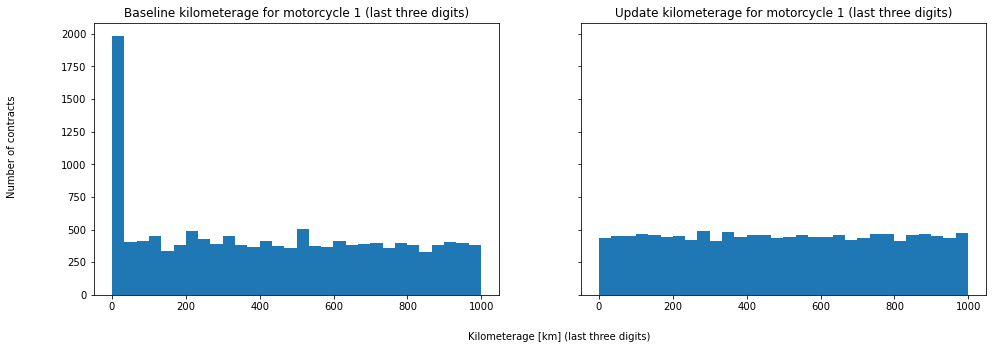

In [643]:
fig, ax = plt.subplots(1,2,figsize= (16,5), sharey = True, sharex = True);

ax[0].hist(policies.baseline_motorcycle1%1000, bins=30);
ax[0].set_title('Baseline kilometerage for motorcycle 1 (last three digits)');
ax[1].hist(policies.update_motorcycle1%1000, bins=30);
ax[1].set_title('Update kilometerage for motorcycle 1 (last three digits)');
fig.text(0.45,0, "Kilometerage [km] (last three digits)");
fig.text(0.05,0.4, "Number of contracts", rotation = 90);

#### Task 6.2: 
The distribution for the baseline is uniform except for a peak value at 000.\
The distribution for the update is uniform.

#### Task 6.3:  
We hypothesize that people have a tendancy to round down their baseline odometer values to obtain a cheaper contract, thus explaining this peak at 0 for the baseline.

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

##### Task 7.1 

The default merge function will use an inner join, and if we specifcy we want to join on the index values, then the fonts corresponding to index's of extreme values we removed from the policies dataframe will be discarded. 

In [644]:
policies_and_fonts = policies.merge(fonts, on='id')
policies_and_fonts.head()
policies_and_fonts.shape

(13474, 15)

##### Task 7.2

In [645]:
num_arial = (policies_and_fonts['font'] == 'Arial').sum()
num_helvetica = (policies_and_fonts['font'] == 'Helvetica').sum()
print('There are', num_arial, 'rows written in Arial font and', num_helvetica, 'written in Helvetica font')

There are 6738 rows written in Arial font and 6736 written in Helvetica font


In to better visualize the distribution we choose to restrict the range to 400,000km.

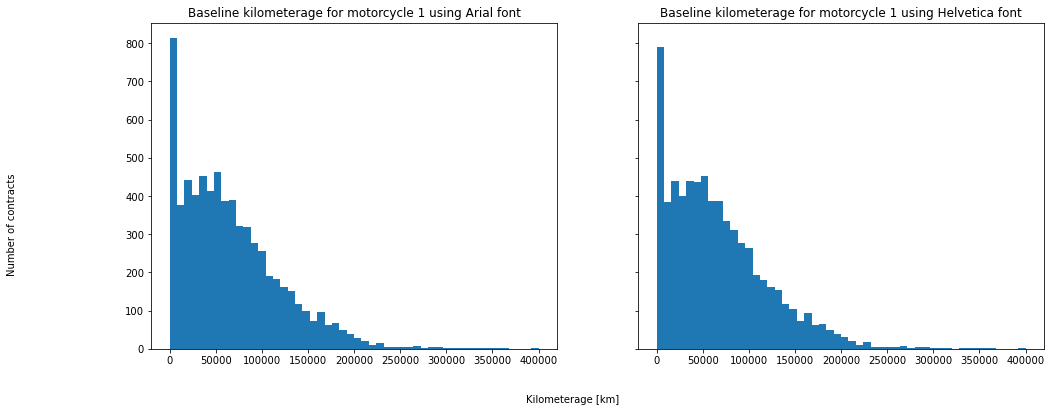

In [646]:
fig, ax = plt.subplots(1,2,figsize= (16,6), sharey = True, sharex = True)

ax[0].hist(policies_and_fonts['baseline_motorcycle1'][policies_and_fonts['font'] == 'Arial'], bins=50, range=[0,400000])
ax[0].set_title('Baseline kilometerage for motorcycle 1 using Arial font')
ax[1].hist(policies_and_fonts['baseline_motorcycle1'][policies_and_fonts['font'] == 'Helvetica'], bins=50, range=[0,400000])
ax[1].set_title('Baseline kilometerage for motorcycle 1 using Helvetica font')

fig.text(0.45,0, "Kilometerage [km]");
fig.text(0,0.3, "Number of contracts", rotation = 90);



##### Task 7.3

Use modulo function similarly to for task 6 ...

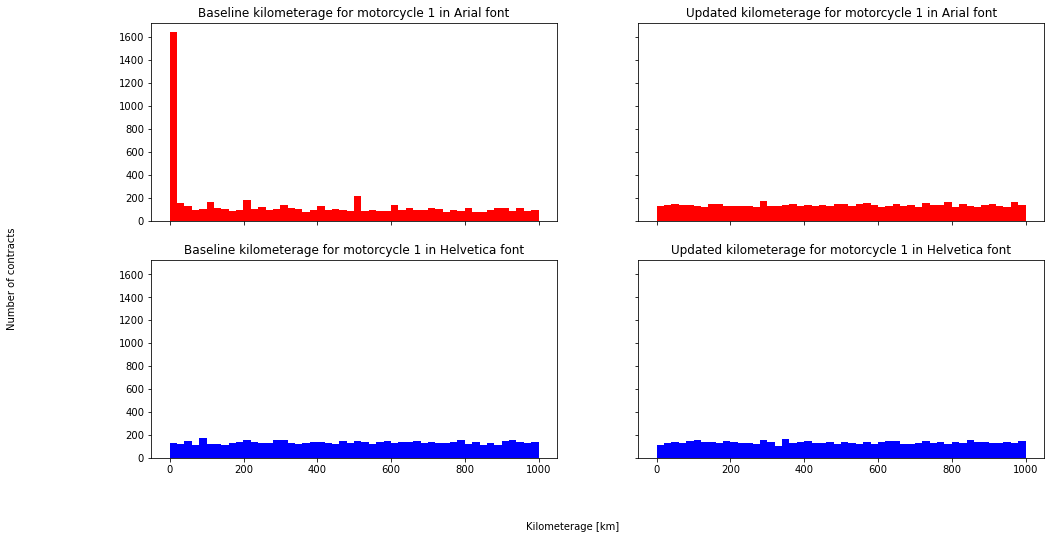

In [647]:
fig, ax = plt.subplots(2,2,figsize= (16,8), sharey = True, sharex = True)

ax[0,0].hist(policies_and_fonts['baseline_motorcycle1'][policies_and_fonts['font'] == 'Arial']%1000, bins=50, color='r')
ax[0,0].set_title('Baseline kilometerage for motorcycle 1 in Arial font')
ax[0,1].hist(policies_and_fonts['update_motorcycle1'][policies_and_fonts['font'] == 'Arial']%1000, bins=50, color='r')
ax[0,1].set_title('Updated kilometerage for motorcycle 1 in Arial font')

ax[1,0].hist(policies_and_fonts['baseline_motorcycle1'][policies_and_fonts['font'] == 'Helvetica']%1000, bins=50, color='b')
ax[1,0].set_title('Baseline kilometerage for motorcycle 1 in Helvetica font')
ax[1,1].hist(policies_and_fonts['update_motorcycle1'][policies_and_fonts['font'] == 'Helvetica']%1000, bins=50, color='b')
ax[1,1].set_title('Updated kilometerage for motorcycle 1 in Helvetica font')

fig.text(0.45,0, "Kilometerage [km]");
fig.text(0,0.35, "Number of contracts", rotation = 90);

##### Task 7.4

We observe two dishonesties in the data. 

Firstly, customers will generally tend to lie and provide a baseline kilometerage value that is lower than what the motorcycle has truly covered. 
Looking at the graphs in task 7.2, we would expect slightly higher values for the first bin to account for brand new motorcycles creating a contract. However, this initial peak is disproportionately higher than the rest of the distribtuion. This leads us to believe that clients who've already used their motorcycle for a small (but non-negligable) distance, prefer to lie and give a tiny (negligable) baseline odometer value to pass off their slightly used motorcycle as brand new. 

This is confirmed in task 7.3 when we look at the baseline kilometerage for the Arial font. We notice again a disproportionatly high number of contracts report a tiny baseline kilometerage value. This is likely as customers choose to round down their kilometerage readings when writing out the form to shave off a bit of cost from their contract. 
Perhaps clients will pass this off as a "reasonable" approximation to simplify the filling out of the forms, but in truth it is a manipulation of the data, and they are likely well aware that by rounding 50490km down to 50000km, they are saving a bit of money from their contract. 
The updated kilometerage readings, which are genuine, show a completely random distribution for the last three numbers, which confirms the hypothesis of clients rounding down their baseline kilometerage when filling out the contract forms. 



The second dishonesty we observe, is with the Arial font data from part 7.3. 
We explained above that we expect clients to lie and round down their kilometerage readings to save a bit of money on their contracts. This should be the case for both fonts, however we observe that the baseline kilometerage readings for Arial font are completely random. There is absolutely no skew towards small values. 
It seems very unlikely that customers filling out the form using Arial font magically decided to be honest, the more likely scenario is that a dishonest data analyst manipulated the whole data to redistribute the large peak of small odometer readings across the whole graph spectrum. 
By re-increasing those last three numbers from the odometer readings, all the contract prices will increase a bit, and the insurance companie will make more money. 

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

We found two types of oddities in the data. 

Firstly, as shown in the graphs from tasks 5.1 and 6.1, people tend to round kilometerage values to small values. 
This happens in two ways. 
In task 5.1 we notice that people tend to lower the total kilometerage, and perhaps try to pass off a used motorcycle as brand new in order to lower the insurance cost. 
In task 6.1, we observe that people round the last three digits of the kilometerage number, to a smaller (zero or near zero) value. Perhaps it is a harmless "approximation" for convenience, but it is also possible that it is to shave off a few kilometers and slightly reduce the contract cost. 

Secondly, in task 7.3, we notice that the above mentioned trend of many people rounding their kilometerage values (to small last three digits) is no longer present in policies written in Helvetica font! 
It would seem that someone has tampered with the data from policies written in Helvetica font, in order to artificially re-organise the "small value peak" throughout the entire distribution, thus slightly increasing all those low numbered kilometerage values.  
Perhaps there is some corruption within the company, and an analyst was tasked with slightly increasing all those kilometerage values in order to squeeze a bit more money out of the contract clients. 

Contrary to the initial hypothesis, we concluded in task 4.3 that signing at the top of the contract increases dishonesty.
However, this conclusion should be taken with a grain of salt, as we have previously shown that some of the data has been tampered with, thus potentially invalidating the results. But, as shown below, the tampered helvetica lines are equally spread amongst signed top and bottom policies.

In [648]:
num_helvetica = (policies_and_fonts['font'] == 'Helvetica').sum()

num_helvetica_top = policies_and_fonts[policies_and_fonts['font'] == 'Helvetica'][policies_and_fonts['condition'] == 'Sign Top']['id'].count()

prop_helvetica_top = num_helvetica_top / num_helvetica
prop_helvetica_top

/var/folders/rs/0p3wv8hx60g_0vd_gt_4c7mw0000gn/T/ipykernel_30849/2692301320.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_helvetica_top = policies_and_fonts[policies_and_fonts['font'] == 'Helvetica'][policies_and_fonts['condition'] == 'Sign Top']['id'].count()


0.5048990498812351